In [61]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

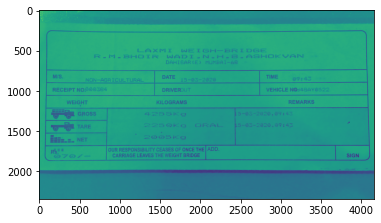

In [62]:
img = cv2.imread("../sample_deskewed.jpg", 0)
plt.imshow(img)

In [63]:
img.shape

(2340, 4160)

(2340, 4160, 3)


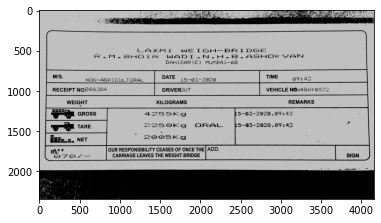

In [64]:
th , im_gray_th_otsu = cv2.threshold(img, 128, 192, cv2.THRESH_OTSU)
cv2.imwrite('../opencv_th_otsu.jpg', im_gray_th_otsu)
binarization = cv2.imread('../opencv_th_otsu.jpg')
plt.imshow(binarization)
print(binarization.shape)

In [65]:
# otsu binarization
# img_bin_otsu = cv2.threshold(img, 0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# plt.imshow(img_bin_otsu)
# cv2.imwrite("../sample_otsu.jpg",img_bin_otsu )

True

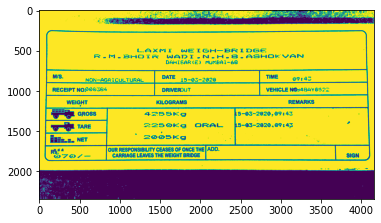

In [66]:
img_filter = cv2.bilateralFilter(im_gray_th_otsu,9,75,75)
plt.imshow(img_filter)
cv2.imwrite("../sample_bilateral.jpg",img_filter )

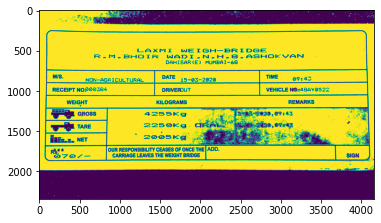

In [67]:

img_bin = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_bin)

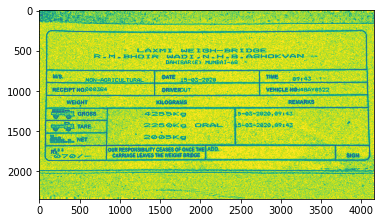

In [68]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th2)

In [69]:
cv2.imwrite("../sample_binary.jpg", th2)

True

In [70]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [71]:
# th2 = cv2.GaussianBlur(th2,(5,5),0)
img_inv = 255-img_filter
iteration_flag = 2

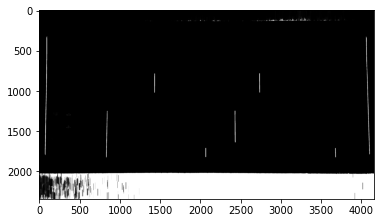

In [72]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_inv, ver_kernel, iterations=iteration_flag)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=iteration_flag)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

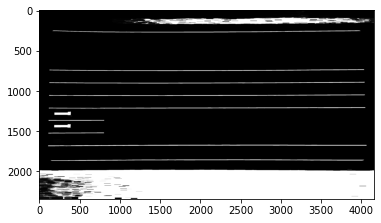

In [73]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_inv, hor_kernel, iterations=iteration_flag)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=iteration_flag)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

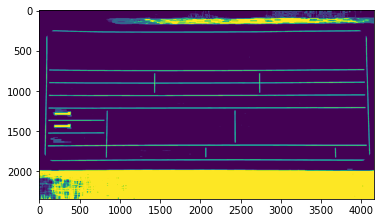

In [74]:
img_vh=image_2|image_1
plt.imshow(img_vh)

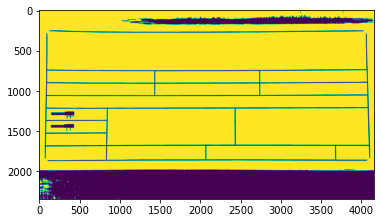

In [75]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_vh)

In [76]:
cv2.imwrite('../table.jpg', img_vh)

True

In [77]:
final_kernel=np.ones((3,3), np.uint8)
img_vh=cv2.dilate(img_vh,final_kernel,iterations=1)
ret, labels, stats,centroids = cv2.connectedComponentsWithStats(img_vh, connectivity=8, ltype=cv2.CV_32S)

In [78]:
def imshow_components(labels):
    ### creating a hsv image, with a unique hue value for each label
    label_hue = np.uint8(179*labels/np.max(labels))
    ### making saturation and volume to be 255
    empty_channel = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, empty_channel, empty_channel])
    ### converting the hsv image to BGR image
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    ### returning the color image for visualising Connected Componenets
    return labeled_img

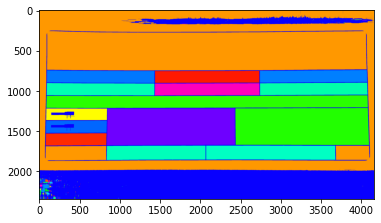

In [79]:
out_image=imshow_components(~labels)
plt.imshow(out_image)

In [80]:
print(len(stats), len(labels))

313 2340


In [81]:
cropped_image = []
for x,y,w,h,area in stats[2:]:
    if area > 10000:
        cropped_image.append(img_filter[y:y+h, x:x+w])

In [82]:
no = 1
for i in cropped_image:
    try:
        cv2.imwrite("../ocr/{}.jpg".format(no), i)
    except:
        pass
    no += 1